# Capstone Project - Analyzing Vehicle Emissions
Please fill out:
* Student name: Joby Varghese
* Student pace: part time
* Scheduled project review date/time: 16 July 2023
* Instructor name: Hardik Idnani
* Blog post URL:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
from scipy import stats
import math
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Fuel_Consumption_2000-2022.csv")

In [3]:
df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


## Data Description

#### Model

● 4WD/4X4 = Four-wheel drive

● AWD = All-wheel drive

● CNG = Compressed natural gas

● FFV = Flexible-fuel vehicle

● NGV = Natural gas vehicle

● # = High output engine that provides more power than the standard engine of the same size

#### Transmission

● A = Automatic

● AM = Automated manual

● AS = Automatic with select shift

● AV = Continuously variable

● M = Manual (3 - 10 = Number of gears)

#### Fuel Type

● X = Regular gasoline

● Z = Premium gasoline

● D = Diesel

● E = Ethanol (E85)

● N = Natural Gas

In [4]:
df1 = df.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


### Indentifying columns with missing values

In [6]:
df1.apply(pd.isnull).sum()/df.shape[0]

YEAR                0.0
MAKE                0.0
MODEL               0.0
VEHICLE CLASS       0.0
ENGINE SIZE         0.0
CYLINDERS           0.0
TRANSMISSION        0.0
FUEL                0.0
FUEL CONSUMPTION    0.0
HWY (L/100 km)      0.0
COMB (L/100 km)     0.0
COMB (mpg)          0.0
EMISSIONS           0.0
dtype: float64

**Based on the observation mentioned above, it appears that the dataset does not contain any null values.**

In [7]:
df1.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


### Correlation Matrix

C:\Users\grace\AppData\Local\Temp\ipykernel_23464\1664415890.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


Text(0.5, 1.0, 'Correlation Matrix')

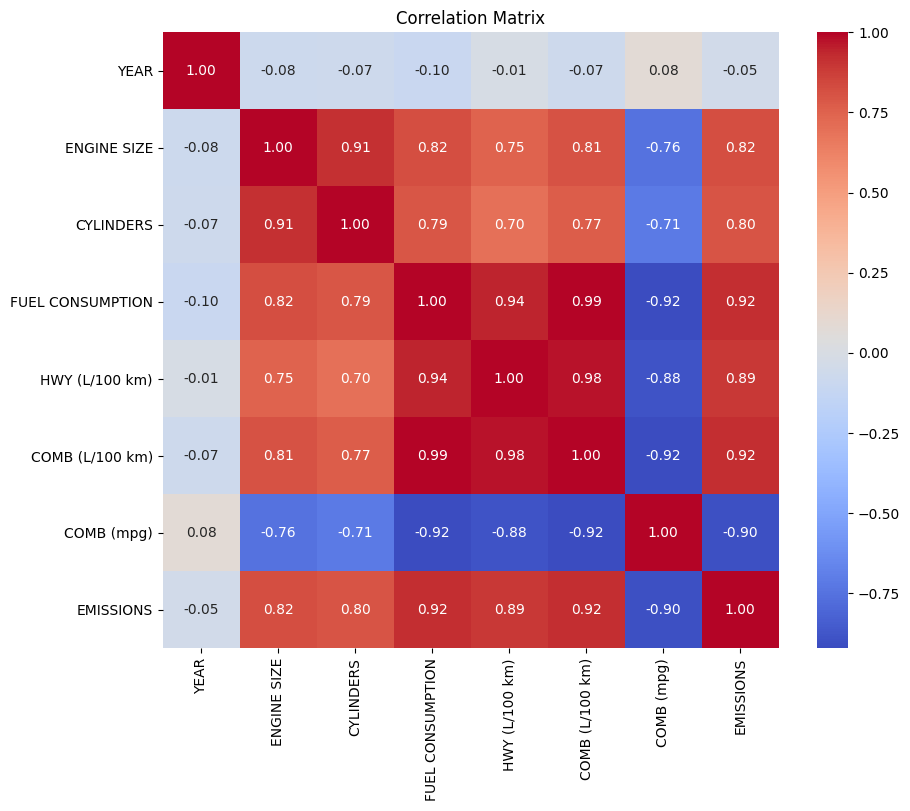

In [8]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')

Based on the above matrix, the variable 'YEAR' exhibits a weak correlation with other variables; hence, it is advisable to drop the said variable from the dataset.

In [9]:
df1 = df1.drop(['YEAR'],axis=1)

### Scatter Plot (To determine linear relationship)

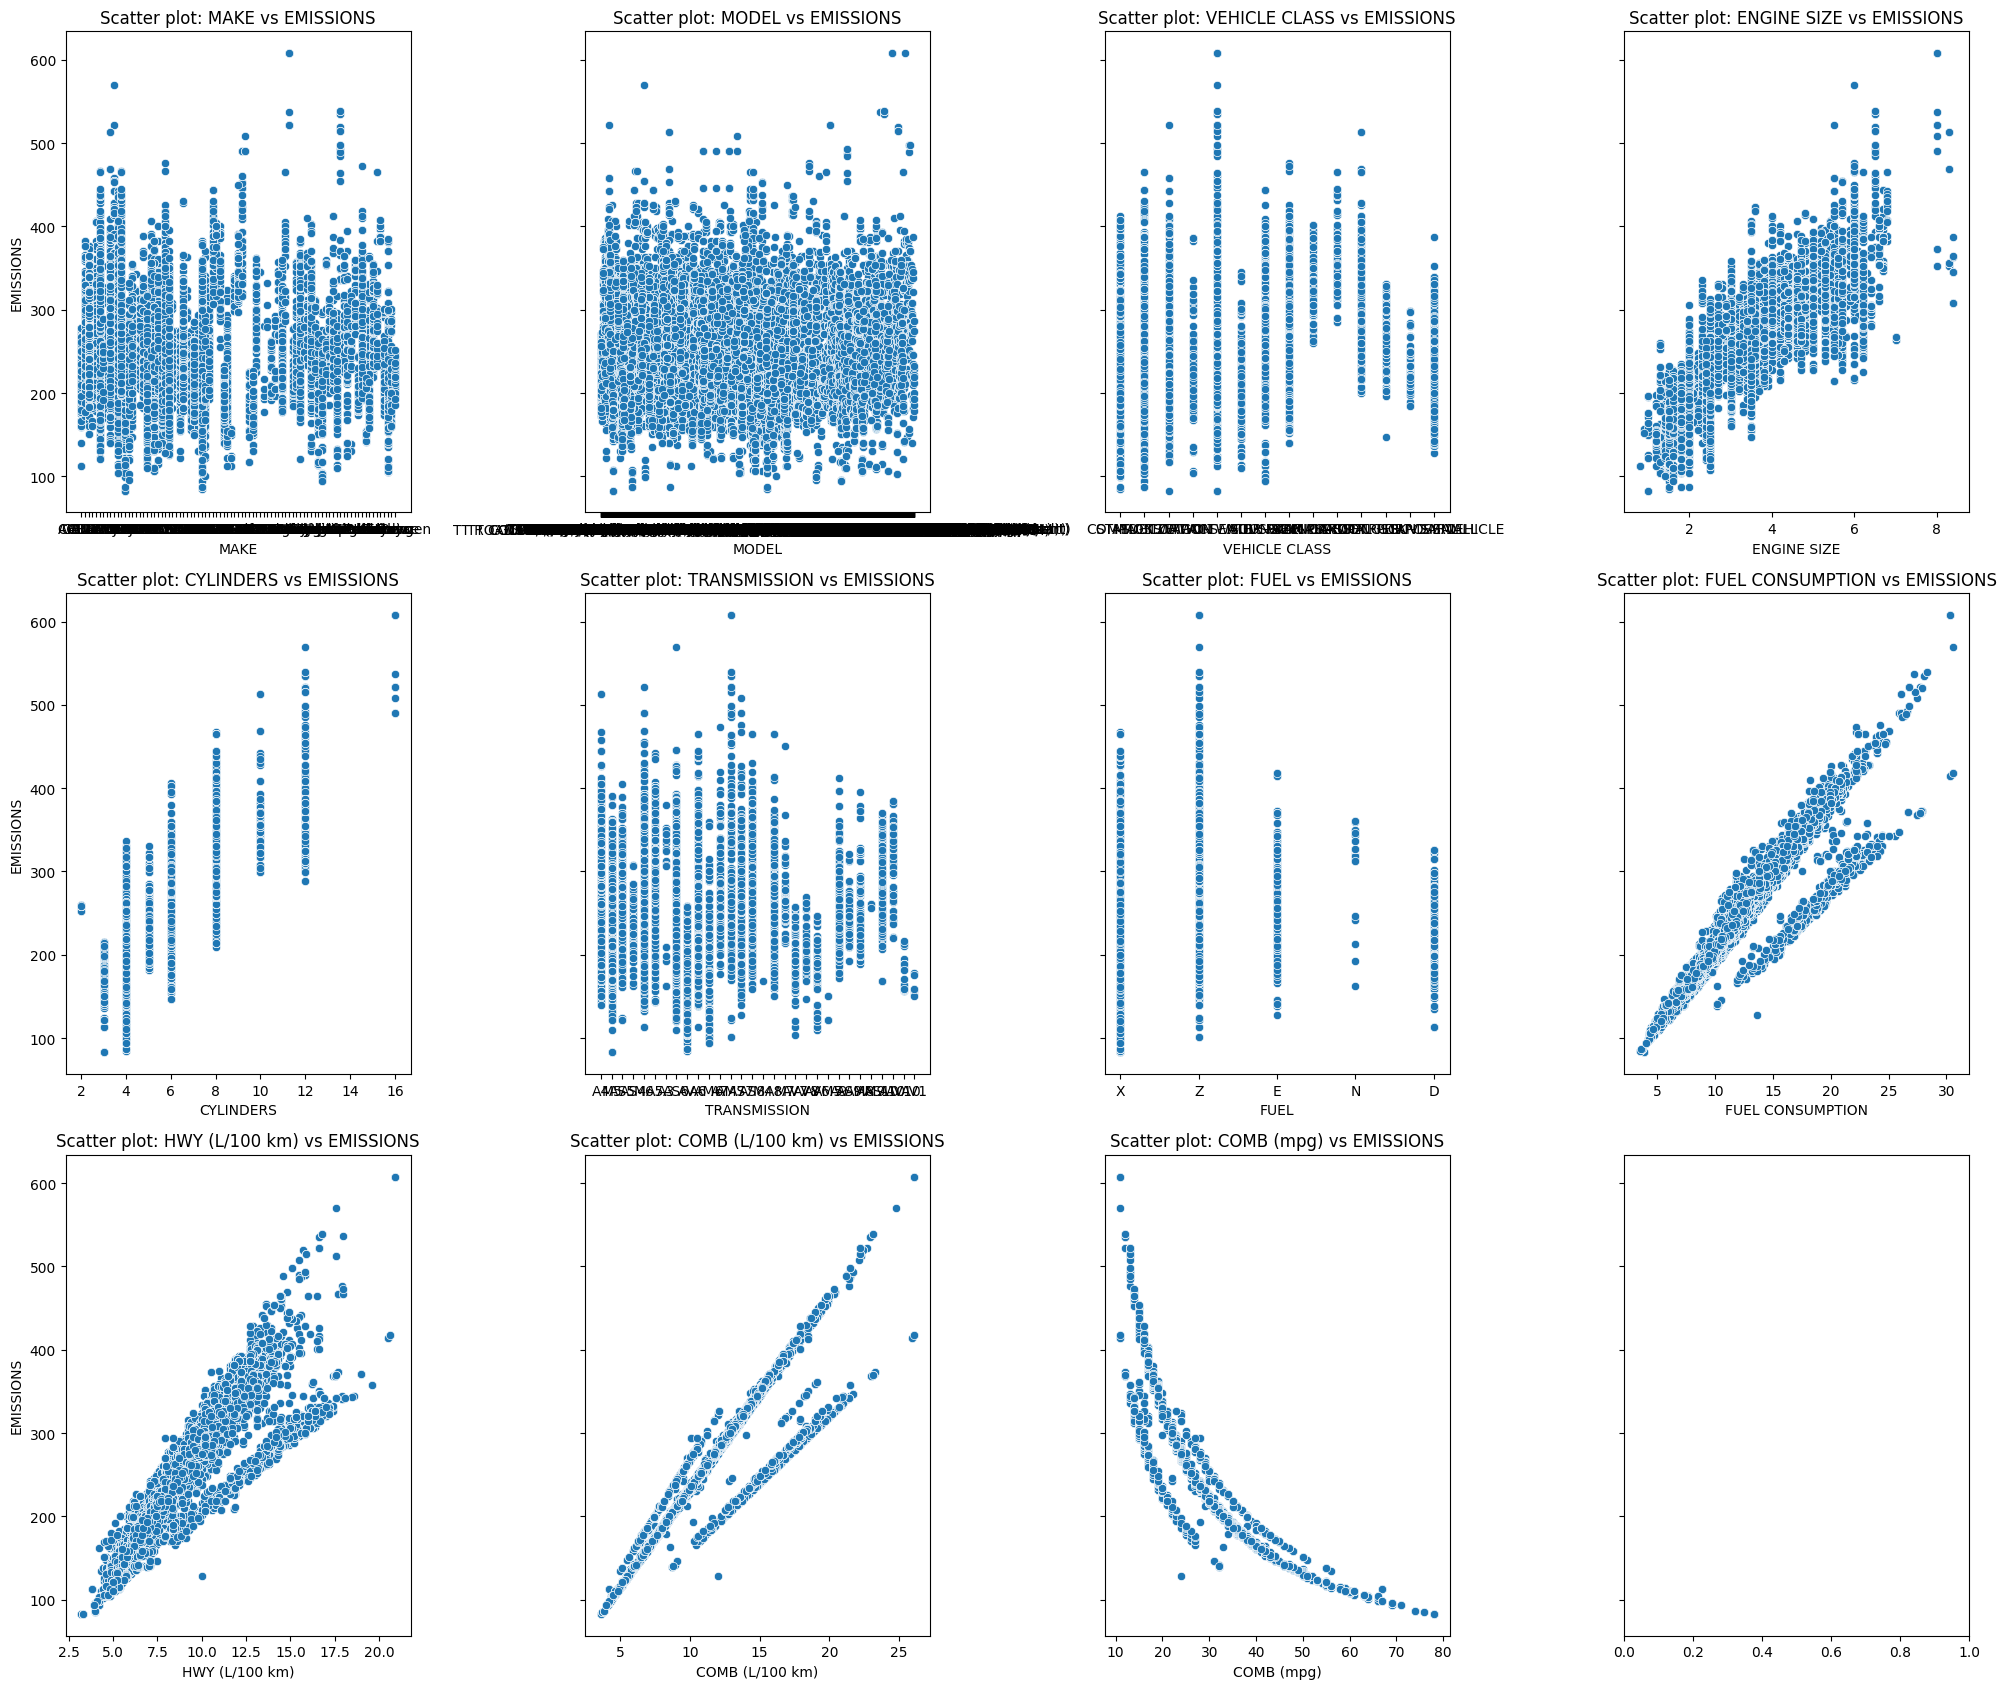

In [10]:
fig, axs = plt.subplots(3, 4, sharey=True, figsize=(20, 17))

# List of predictor variables
predictor_variables = ['MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
                       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
                       'COMB (L/100 km)', 'COMB (mpg)']

# Iterate over the predictor variables and create scatter plots
for idx, channel in enumerate(predictor_variables):
    row = idx // 4
    col = idx % 4
    sns.scatterplot(x=channel, y='EMISSIONS', data=df1, ax=axs[row, col])
    axs[row, col].set_xlabel(channel)
    axs[row, col].set_ylabel('EMISSIONS')
    axs[row, col].set_title(f'Scatter plot: {channel} vs EMISSIONS')

plt.tight_layout()
plt.show()

Considering that we could not establish a linear relationship between the predictor variables 'MAKE' and 'MODEL' with 'EMISSIONS', and that the make and model of a vehicle are already classified based on factors such as engine size, number of cylinders, transmission, and fuel type, it is recommended to remove these variables 'MAKE' and 'MODEL' from the dataset. Applying categorical treatment to these predictors would result in a substantial increase in the number of columns within the DataFrame. Therefore, dropping these variables would simplify the dataset and avoid unnecessary complexity in the model.

The "VEHICLE CLASS" variable holds significant importance in identifying the corresponding emission levels and plays a crucial role in classifying cars within the model. Therefore, it is highly recommended to treat "VEHICLE CLASS" as a standalone variable in the model, as it contributes significantly to understanding and predicting emissions.

The variables 'FUEL CONSUMPTION', 'HWY (L/100 km)', and 'COMB (L/100 km)' demonstrate a positive linear correlation with 'EMISSIONS', meaning that as these variables increase, so do the emissions. However, the variable 'COMB (mpg)' exhibits a negative linear correlation. This suggests that as the mileage increases (higher the 'COMB (mpg)'), fuel consumption decreases, resulting in lower emissions. Therefore, it is evident that higher mileage is associated with reduced fuel consumption and subsequently lower emissions.

The values in the 'COMB (L/100 km)' variable are largely similar to the average values of the 'FUEL CONSUMPTION' and 'HWY (L/100 km)' variables. Therefore, it is appropriate to remove the 'FUEL CONSUMPTION' and 'HWY (L/100 km)' variables from the dataset.

In [11]:
df1 = df1.drop(['MAKE', 'MODEL','FUEL CONSUMPTION','HWY (L/100 km)'],axis=1)
df1.head()

,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,COMB (L/100 km),COMB (mpg),EMISSIONS
0,COMPACT,1.6,4,A4,X,8.1,35,186
1,COMPACT,1.6,4,M5,X,7.6,37,175
2,MID-SIZE,3.2,6,AS5,Z,10.0,28,230
3,MID-SIZE,3.5,6,A4,Z,11.5,25,264
4,SUBCOMPACT,1.8,4,A4,X,8.6,33,198


In [12]:
# Categorical & Continuous columns to be dealt
categorical_cols = ['VEHICLE CLASS','CYLINDERS','TRANSMISSION', 'FUEL']
continuous_cols = ['ENGINE SIZE','COMB (L/100 km)','COMB (mpg)','EMISSIONS']

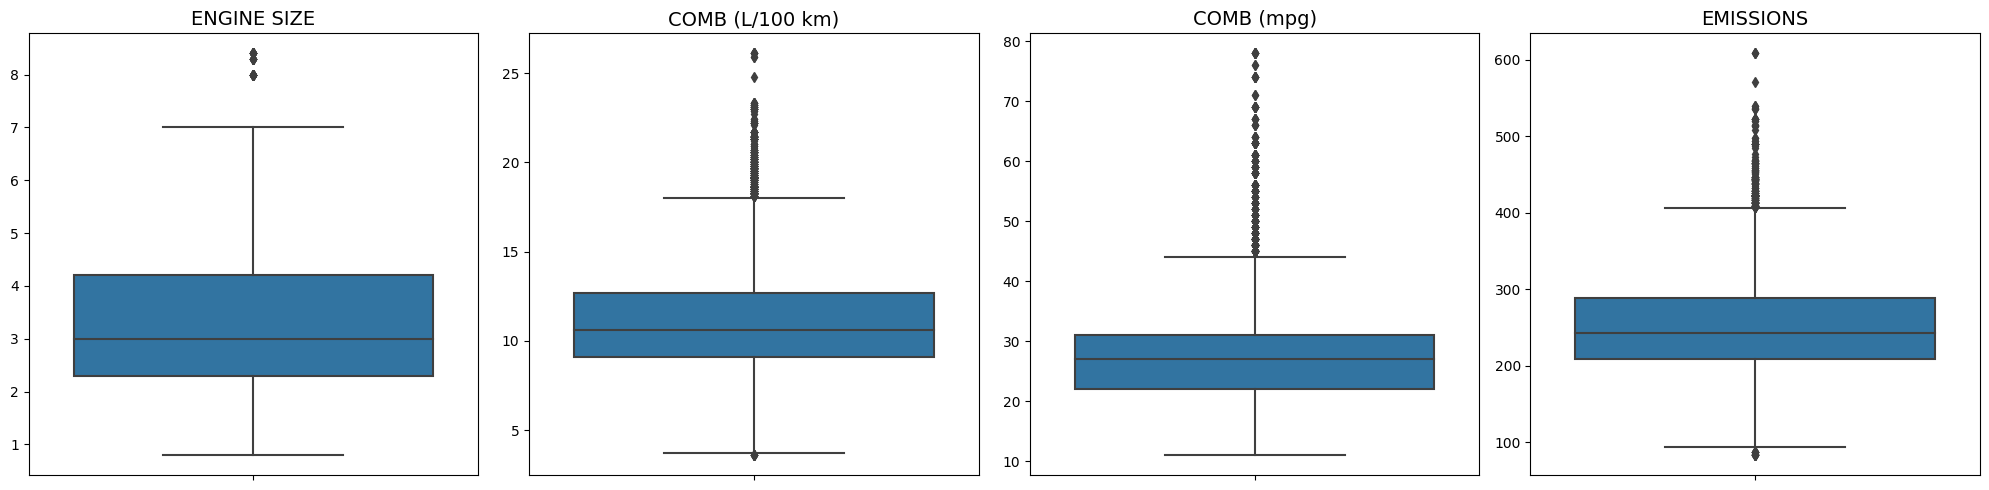

In [13]:
# Define the column groups
cols1 = ['ENGINE SIZE','COMB (L/100 km)','COMB (mpg)','EMISSIONS']

#Create subplots
fig, axes = plt.subplots(1, len(cols1), figsize=(20, 5))

# Generate boxplots for each column
for i, col in enumerate(cols1):
    sns.boxplot(y=col, data=df1, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The boxplot above shows the presence of outliers in the 'COMB (mpg)', 'COMB (L/100 km)', and 'EMISSIONS' variables. Minimizing the number of outliers in the dataset is desirable since extreme outliers can significantly impact the analysis and interpretation of the data. The outliers within the variables 'COMB (mpg)', 'COMB (L/100 km)', and 'EMISSIONS' will be handled using the quantile-based method. This method involves identifying extreme values beyond specific quantiles to effectively address outliers.

In [14]:
# Calculate IQR for 'COMB (mpg)'
Q1_COMB_mpg = df1['COMB (mpg)'].quantile(0.25)
Q3_COMB_mpg = df1['COMB (mpg)'].quantile(0.75)
IQR_COMB_mpg = Q3_COMB_mpg - Q1_COMB_mpg
# Calculate lower and upper bounds for 'COMB (mpg)'
lower_bound_COMB_mpg = Q1_COMB_mpg - (1.5 * IQR_COMB_mpg)
upper_bound_COMB_mpg = Q3_COMB_mpg + (1.5 * IQR_COMB_mpg)
# Remove outliers for 'COMB (mpg)'
df1 = df1[(df1['COMB (mpg)'] >= lower_bound_COMB_mpg) & (df1['COMB (mpg)'] <= upper_bound_COMB_mpg)]


# Calculate IQR for 'COMB (L/100 km)'
Q1_COMB_L100km = df1['COMB (L/100 km)'].quantile(0.25)
Q3_COMB_L100km = df1['COMB (L/100 km)'].quantile(0.75)
IQR_COMB_L100km = Q3_COMB_L100km - Q1_COMB_L100km
# Calculate lower and upper bounds for 'COMB (L/100 km)'
lower_bound_COMB_L100km = Q1_COMB_L100km - (1.5 * IQR_COMB_L100km)
upper_bound_COMB_L100km = Q3_COMB_L100km + (1.5 * IQR_COMB_L100km)
# Remove outliers for 'COMB (L/100 km)'
df1 = df1[(df1['COMB (L/100 km)'] >= lower_bound_COMB_L100km) & (df1['COMB (L/100 km)'] <= upper_bound_COMB_L100km)]


# Calculate IQR for 'EMISSIONS'
Q1_EMISSIONS = df1['EMISSIONS'].quantile(0.25)
Q3_EMISSIONS = df1['EMISSIONS'].quantile(0.75)
IQR_EMISSIONS = Q3_EMISSIONS - Q1_EMISSIONS
# Calculate lower and upper bounds for 'EMISSIONS'
lower_bound_EMISSIONS = Q1_EMISSIONS - (1.5 * IQR_EMISSIONS)
upper_bound_EMISSIONS = Q3_EMISSIONS + (1.5 * IQR_EMISSIONS)
# Remove outliers for 'EMISSIONS'
df1 = df1[(df1['EMISSIONS'] >= lower_bound_EMISSIONS) & (df1['EMISSIONS'] <= upper_bound_EMISSIONS)]


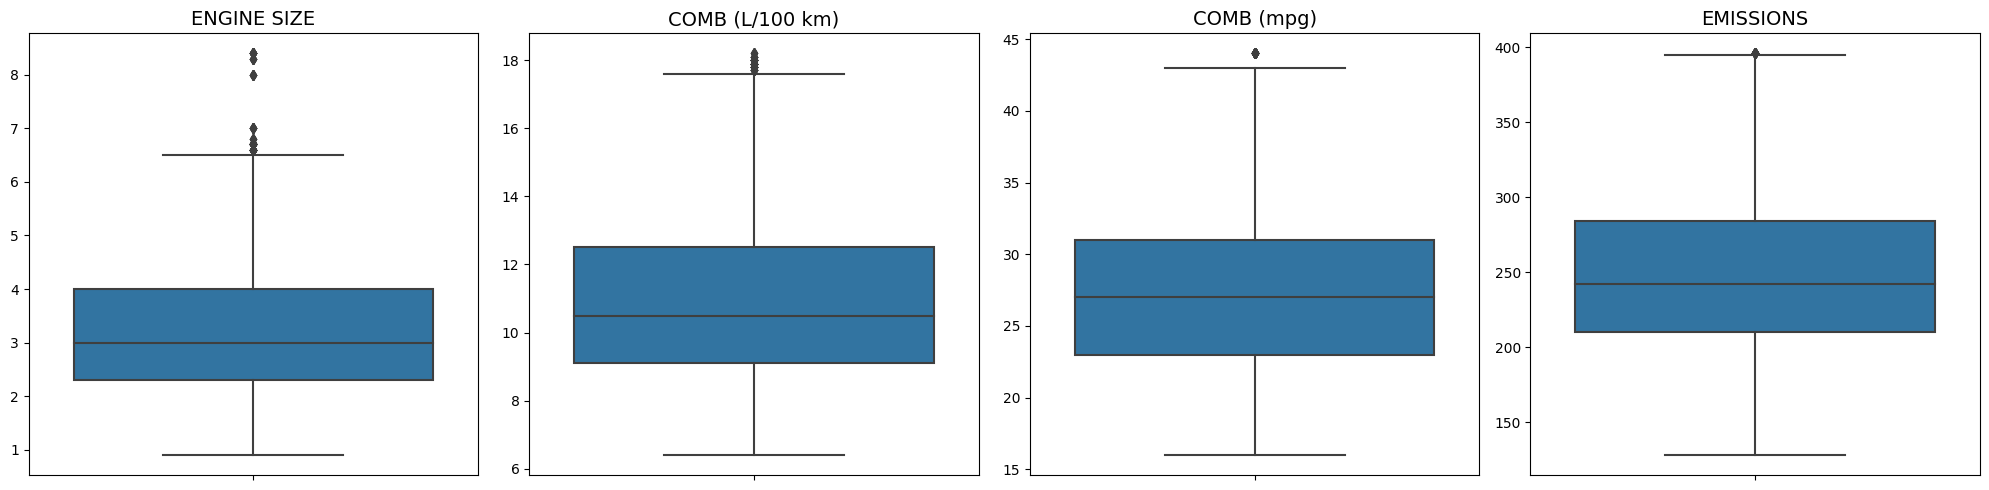

In [15]:
#Create subplots
fig, axes = plt.subplots(1, len(cols1), figsize=(20, 5))

# Generate boxplots for each column
for i, col in enumerate(cols1):
    sns.boxplot(y=col, data=df1, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

After removing the outliers from the dataset, the boxplot provides a better representation of the data distribution for the variables 'COMB (mpg)', 'COMB (L/100 km)', and 'EMISSIONS'. The data now appears to be more reasonable and suitable for further analysis.

### Handling Categorical Variables: Creating Dummy Variables for Enhanced Analysis

In [16]:
dummy_columns = []
dummy_data = []

for col in categorical_cols:
    dummies = pd.get_dummies(df1[col], prefix=col, drop_first=True)
    dummy_columns.extend(list(dummies.columns))
    dummy_data.append(dummies)

# Concatenate the dummy variables into a single DataFrame
dummy_df1 = pd.concat(dummy_data, axis=1)

# Assign column names to the dummy variables
dummy_df1.columns = dummy_columns

df1 = df1.drop(['VEHICLE CLASS','CYLINDERS', 'TRANSMISSION', 'FUEL'], axis=1)
df1 = pd.concat([dummy_df1, df1], axis=1)
df1

,VEHICLE CLASS_FULL-SIZE,VEHICLE CLASS_MID-SIZE,VEHICLE CLASS_PICKUP TRUCK - SMALL,VEHICLE CLASS_PICKUP TRUCK - STANDARD,VEHICLE CLASS_SPECIAL PURPOSE VEHICLE,VEHICLE CLASS_STATION WAGON - MID-SIZE,VEHICLE CLASS_STATION WAGON - SMALL,VEHICLE CLASS_SUBCOMPACT,VEHICLE CLASS_SUV - SMALL,VEHICLE CLASS_SUV - STANDARD,...,TRANSMISSION_M6,TRANSMISSION_M7,FUEL_E,FUEL_N,FUEL_X,FUEL_Z,ENGINE SIZE,COMB (L/100 km),COMB (mpg),EMISSIONS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1.6,8.1,35,186
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1.6,7.6,37,175
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3.2,10.0,28,230
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3.5,11.5,25,264
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1.8,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,2.0,9.4,30,219
22552,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,2.0,9.4,30,219
22553,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,2.0,9.9,29,232
22554,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,2.0,10.1,28,236


After creating the dummy variables, we have now 56 Predictor Variables and 1 Target Variable

### Multicollinearity Check

In [17]:
df1_preprocessed = df1.drop(['EMISSIONS'], axis=1)
df1_preprocessed = df1_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df1_preprocessed['pairs'] = list(zip(df1_preprocessed.level_0, df1_preprocessed.level_1))

# set index to pairs
df1_preprocessed.set_index(['pairs'], inplace = True)

#d rop level columns
df1_preprocessed.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df1_preprocessed.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df1_preprocessed.drop_duplicates(inplace=True)
df1_preprocessed[(df1_preprocessed.cc>.75) & (df1_preprocessed.cc <1)]
df1_preprocessed[(df1_preprocessed.cc>.75) & (df1_preprocessed.cc <1)]

,cc
pairs,
"(COMB (L/100 km), COMB (mpg))",0.964907
"(FUEL_X, FUEL_Z)",0.910626
"(ENGINE SIZE, COMB (L/100 km))",0.805281
"(COMB (mpg), ENGINE SIZE)",0.783551


Dropping the one of the variables from each pairs which is having the correlation greater than 0.75 and less than 1.

In [18]:
df1.drop(['COMB (L/100 km)', 'FUEL_X', 'COMB (mpg)'], axis=1, inplace=True)

### Transformation of Continuous Variables - Log Transformation

#### Histogram  - EMISSIONS (Pre Log Transformation)

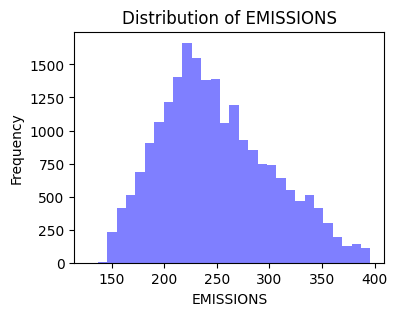

In [19]:
# Plot histogram of 'EMISSIONS'
plt.figure(figsize=(4, 3))
plt.hist(df1['EMISSIONS'], bins=30, color='blue', alpha=0.5)
plt.xlabel('EMISSIONS')
plt.ylabel('Frequency')
plt.title('Distribution of EMISSIONS')
plt.show()

The histogram illustrates a slightly right-skewed data distribution of the target variable 'EMISSIONS.' Applying a log transformation to the data may help mitigate the skewness and bring the distribution closer to normality.

#### EMISSIONS (Log Transformation)

In [20]:
# Log Transformation of 'EMISSIONS'

target = ['EMISSIONS']

for feat1 in target:
    df1[feat1] = df1[feat1].map(lambda x: np.log(x))

#### Histogram  - EMISSIONS (Post Log Transformation)

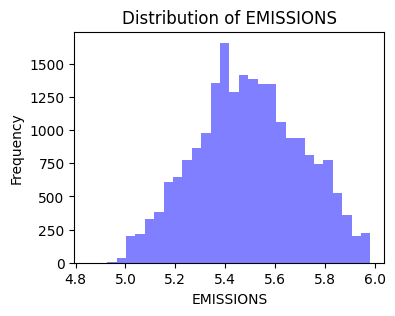

In [21]:
# Plot histogram of 'EMISSIONS'
plt.figure(figsize=(4, 3))
plt.hist(df1['EMISSIONS'], bins=30, color='blue', alpha=0.5)
plt.xlabel('EMISSIONS')
plt.ylabel('Frequency')
plt.title('Distribution of EMISSIONS')
plt.show()

Based on the provided illustration, it can be observed that the data distribution of the target variable 'EMISSIONS'after the log transformation closely resembles a normal distribution.

In [22]:
continuous_cols = ['ENGINE SIZE']

#### Histogram  - ENGINE SIZE (Pre Log Transformation)

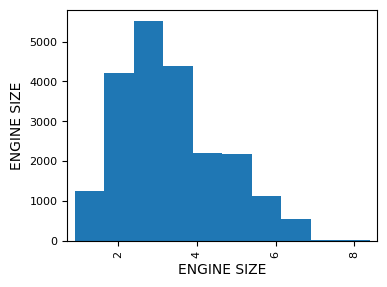

In [23]:
pd.plotting.scatter_matrix(df1[continuous_cols], figsize=(4,3));

Based on the above illustrations, it can be observed that the variable 'ENGINE SIZE' exhibit right skewness. Performing a log transformation on these variables may help bring the distribution of data points closer to normality to some extent.

#### Log Transformation  - ENGINE SIZE

In [24]:
# Log Transformation of 'ENGINE SIZE'

cont_col = ['ENGINE SIZE']

for feat2 in cont_col:
    df1[feat2] = df1[feat2].map(lambda x: np.log(x))

#### Histogram  - ENGINE SIZE (Post Log Transformation)

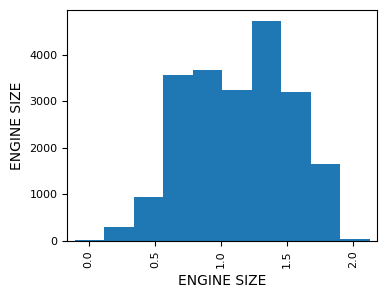

In [25]:
pd.plotting.scatter_matrix(df1[continuous_cols], figsize=(4,3));

Applying a log transformation has proven effective in reducing the influence of extreme values. As a result, the log-transformed data points for 'ENGINE SIZE' now demonstrate distributions that closely resemble a normal distribution pattern. The log transformation has successfully addressed the positive skewness observed in the original variables and has resulted in distributions that align more closely with the assumptions of normality.

### Standardisation of 'ENGINE SIZE' and 'EMISSIONS'

In [26]:
df_std = df1[['ENGINE SIZE','EMISSIONS']].copy()
df_std

,ENGINE SIZE,EMISSIONS
0,0.470004,5.225747
1,0.470004,5.164786
2,1.163151,5.438079
3,1.252763,5.575949
4,0.587787,5.288267
...,...,...
22551,0.693147,5.389072
22552,0.693147,5.389072
22553,0.693147,5.446737
22554,0.693147,5.463832


In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a MinMaxScaler object for Min-Max scaling
min_max_scaler = MinMaxScaler()

# Perform Min-Max scaling on 'EMISSIONS'
df_scaled = df_std.copy()  # Create a copy of the DataFrame
df_scaled[['EMISSIONS','ENGINE SIZE']] = min_max_scaler.fit_transform(df_scaled[['EMISSIONS','ENGINE SIZE']])

df_scaled

,ENGINE SIZE,EMISSIONS
0,0.257596,0.330903
1,0.257596,0.276926
2,0.567924,0.518910
3,0.608045,0.640986
4,0.310328,0.386261
...,...,...
22551,0.357499,0.475517
22552,0.357499,0.475517
22553,0.357499,0.526577
22554,0.357499,0.541713


In [28]:
df1.drop(['ENGINE SIZE', 'EMISSIONS'], axis=1, inplace=True)
df1 = pd.concat([df1,df_scaled],axis=1)

In [29]:
df1.columns

Index(['VEHICLE CLASS_FULL-SIZE', 'VEHICLE CLASS_MID-SIZE',
       'VEHICLE CLASS_PICKUP TRUCK - SMALL',
       'VEHICLE CLASS_PICKUP TRUCK - STANDARD',
       'VEHICLE CLASS_SPECIAL PURPOSE VEHICLE',
       'VEHICLE CLASS_STATION WAGON - MID-SIZE',
       'VEHICLE CLASS_STATION WAGON - SMALL', 'VEHICLE CLASS_SUBCOMPACT',
       'VEHICLE CLASS_SUV - SMALL', 'VEHICLE CLASS_SUV - STANDARD',
       'VEHICLE CLASS_TWO-SEATER', 'VEHICLE CLASS_VAN - CARGO',
       'VEHICLE CLASS_VAN - PASSENGER', 'CYLINDERS_3', 'CYLINDERS_4',
       'CYLINDERS_5', 'CYLINDERS_6', 'CYLINDERS_8', 'CYLINDERS_10',
       'CYLINDERS_12', 'TRANSMISSION_A3', 'TRANSMISSION_A4', 'TRANSMISSION_A5',
       'TRANSMISSION_A6', 'TRANSMISSION_A7', 'TRANSMISSION_A8',
       'TRANSMISSION_A9', 'TRANSMISSION_AM5', 'TRANSMISSION_AM6',
       'TRANSMISSION_AM7', 'TRANSMISSION_AM8', 'TRANSMISSION_AM9',
       'TRANSMISSION_AS10', 'TRANSMISSION_AS4', 'TRANSMISSION_AS5',
       'TRANSMISSION_AS6', 'TRANSMISSION_AS7', 'TRANSMISSION_

## Linear Regression Model using Ordinary Least Squares (OLS)

In [30]:
# Fit the OLS model
X = df1[['VEHICLE CLASS_FULL-SIZE', 'VEHICLE CLASS_MID-SIZE',
       'VEHICLE CLASS_PICKUP TRUCK - SMALL',
       'VEHICLE CLASS_PICKUP TRUCK - STANDARD',
       'VEHICLE CLASS_SPECIAL PURPOSE VEHICLE',
       'VEHICLE CLASS_STATION WAGON - MID-SIZE',
       'VEHICLE CLASS_STATION WAGON - SMALL', 'VEHICLE CLASS_SUBCOMPACT',
       'VEHICLE CLASS_SUV - SMALL', 'VEHICLE CLASS_SUV - STANDARD',
       'VEHICLE CLASS_TWO-SEATER', 'VEHICLE CLASS_VAN - CARGO',
       'VEHICLE CLASS_VAN - PASSENGER', 'CYLINDERS_3', 'CYLINDERS_4',
       'CYLINDERS_5', 'CYLINDERS_6', 'CYLINDERS_8', 'CYLINDERS_10',
       'CYLINDERS_12', 'TRANSMISSION_A3', 'TRANSMISSION_A4', 'TRANSMISSION_A5',
       'TRANSMISSION_A6', 'TRANSMISSION_A7', 'TRANSMISSION_A8',
       'TRANSMISSION_A9', 'TRANSMISSION_AM5', 'TRANSMISSION_AM6',
       'TRANSMISSION_AM7', 'TRANSMISSION_AM8', 'TRANSMISSION_AM9',
       'TRANSMISSION_AS10', 'TRANSMISSION_AS4', 'TRANSMISSION_AS5',
       'TRANSMISSION_AS6', 'TRANSMISSION_AS7', 'TRANSMISSION_AS8',
       'TRANSMISSION_AS9', 'TRANSMISSION_AV', 'TRANSMISSION_AV1',
       'TRANSMISSION_AV10', 'TRANSMISSION_AV6', 'TRANSMISSION_AV7',
       'TRANSMISSION_AV8', 'TRANSMISSION_M4', 'TRANSMISSION_M5',
       'TRANSMISSION_M6', 'TRANSMISSION_M7', 'FUEL_E', 'FUEL_N', 'FUEL_Z',
       'ENGINE SIZE']]
y = df1['EMISSIONS']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results_IT_1 = model.fit()
print(results_IT_1.summary())

                            OLS Regression Results                            
Dep. Variable:              EMISSIONS   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1572.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:59:18   Log-Likelihood:                 22471.
No. Observations:               21415   AIC:                        -4.483e+04
Df Residuals:                   21361   BIC:                        -4.440e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

### Stepwise Feature Selection for Linear Regression Model

To improve the interpretability of the model and identify the most relevant features that significantly impact the target variable, a stepwise feature selection method can be employed. This technique helps us systematically include or exclude predictor variables based on their statistical significance. Variables with p-values greater than 0.05 are considered less significant and might not contribute significantly to explaining the variation in the target variable.

By applying the stepwise method, we aim to identify the subset of predictor variables that have the most substantial impact on the target variable while removing those that do not provide significant information. This process streamlines the model and ensures that only the most relevant variables are retained, leading to a more concise and interpretable final model.

In [31]:
#import numpy as np
#import pandas as pd
#import statsmodels.api as sm

# Create a function for stepwise selection
#def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    #included = list(initial_list)
    #while True:
        #changed = False
        ## Forward step
        #excluded = list(set(X.columns) - set(included))
        #new_pval = pd.Series(index=excluded, dtype='float64')
        #for new_column in excluded:
            #model = sm.OLS(y, sm.add_constant(X[included + [new_column]])).fit()
            #new_pval[new_column] = model.pvalues[new_column]
        #best_pval = new_pval.min()
        #if best_pval < threshold_in:
            #best_feature = new_pval.idxmin()
            #included.append(best_feature)
            #changed = True
            #if verbose:
                #print(f'Add {best_feature} with p-value {best_pval:.6f}')
        ## Backward step
        #model = sm.OLS(y, sm.add_constant(X[included])).fit()
        #pvalues = model.pvalues.iloc[1:]
        #worst_pval = pvalues.max()
        #if worst_pval > threshold_out:
            #changed = True
            #worst_feature = pvalues.idxmax()
            #included.remove(worst_feature)
            #if verbose:
                #print(f'Drop {worst_feature} with p-value {worst_pval:.6f}')
        #if not changed:
            #break
    #return included

In [32]:
#X = df1.drop('EMISSIONS', axis=1)
#y = df1['EMISSIONS']

#result = stepwise_selection(X, y, verbose = True)
#print('resulting features:')
#print(result)

resulting features:
['ENGINE SIZE', 'TRANSMISSION_AV', 'FUEL_E', 'VEHICLE CLASS_PICKUP TRUCK - STANDARD', 'VEHICLE CLASS_SUV - STANDARD', 'FUEL_Z', 'VEHICLE CLASS_SUV - SMALL', 'VEHICLE CLASS_VAN - PASSENGER', 'VEHICLE CLASS_PICKUP TRUCK - SMALL', 'VEHICLE CLASS_VAN - CARGO', 'CYLINDERS_12', 'CYLINDERS_4', 'CYLINDERS_10', 'VEHICLE CLASS_SPECIAL PURPOSE VEHICLE', 'CYLINDERS_8', 'TRANSMISSION_A6', 'TRANSMISSION_AV6', 'TRANSMISSION_AS7', 'TRANSMISSION_AS10', 'TRANSMISSION_AV10', 'TRANSMISSION_AM8', 'TRANSMISSION_M5', 'CYLINDERS_3', 'TRANSMISSION_AV7', 'CYLINDERS_5', 'CYLINDERS_6', 'VEHICLE CLASS_STATION WAGON - MID-SIZE', 'TRANSMISSION_AS8', 'TRANSMISSION_AM7', 'TRANSMISSION_A9', 'TRANSMISSION_A3', 'VEHICLE CLASS_STATION WAGON - SMALL', 'VEHICLE CLASS_TWO-SEATER', 'TRANSMISSION_A8', 'TRANSMISSION_A7', 'TRANSMISSION_AS6', 'TRANSMISSION_AV8', 'TRANSMISSION_AV1', 'VEHICLE CLASS_SUBCOMPACT', 'FUEL_N', 'VEHICLE CLASS_FULL-SIZE']

Based on the above derivation, the variables listed under the 'resulting features' are considered to be statistically significant predictors for the target variable based on their p-values. All the features have p-values less than 0.01, which means they have a strong statistical relationship with the target variable in the context of the model. 

To prevent changes in the resulting features each time whilst re-running the code, a prefix (# sign) has been added to the codes. This way, the codes won't be executed, and the output won't alter the existing features in the existing environment.

In [33]:
df2 = df1[['CYLINDERS_10', 'CYLINDERS_12', 'CYLINDERS_3', 'CYLINDERS_4', 'CYLINDERS_5', 'CYLINDERS_6', 
           'CYLINDERS_8','FUEL_E', 'FUEL_N', 'FUEL_Z', 'TRANSMISSION_A3', 'TRANSMISSION_A6', 
           'TRANSMISSION_A7', 'TRANSMISSION_A8', 'TRANSMISSION_A9', 'TRANSMISSION_AM7', 'TRANSMISSION_AM8', 
           'TRANSMISSION_AS10', 'TRANSMISSION_AS6', 'TRANSMISSION_AS7', 'TRANSMISSION_AS8', 'TRANSMISSION_AV', 
           'TRANSMISSION_AV1', 'TRANSMISSION_AV6', 'TRANSMISSION_AV7', 'TRANSMISSION_AV8', 'TRANSMISSION_AV10', 
           'TRANSMISSION_M5', 'VEHICLE CLASS_FULL-SIZE', 'VEHICLE CLASS_PICKUP TRUCK - SMALL', 
           'VEHICLE CLASS_PICKUP TRUCK - STANDARD', 'VEHICLE CLASS_SPECIAL PURPOSE VEHICLE', 
           'VEHICLE CLASS_STATION WAGON - MID-SIZE', 'VEHICLE CLASS_STATION WAGON - SMALL', 
           'VEHICLE CLASS_SUBCOMPACT', 'VEHICLE CLASS_SUV - SMALL', 'VEHICLE CLASS_SUV - STANDARD', 
           'VEHICLE CLASS_TWO-SEATER', 'VEHICLE CLASS_VAN - CARGO', 'VEHICLE CLASS_VAN - PASSENGER','ENGINE SIZE',
           'EMISSIONS']].copy()

## Linear Regression Model after Stepwise Feature Selection

In [34]:
X = df2[['CYLINDERS_10', 'CYLINDERS_12', 'CYLINDERS_3', 'CYLINDERS_4', 'CYLINDERS_5', 'CYLINDERS_6', 
        'CYLINDERS_8','FUEL_E', 'FUEL_N', 'FUEL_Z', 'TRANSMISSION_A3', 'TRANSMISSION_A6', 
        'TRANSMISSION_A7', 'TRANSMISSION_A8', 'TRANSMISSION_A9', 'TRANSMISSION_AM7', 'TRANSMISSION_AM8', 
        'TRANSMISSION_AS10', 'TRANSMISSION_AS6', 'TRANSMISSION_AS7', 'TRANSMISSION_AS8', 'TRANSMISSION_AV', 
        'TRANSMISSION_AV1', 'TRANSMISSION_AV6', 'TRANSMISSION_AV7', 'TRANSMISSION_AV8', 'TRANSMISSION_AV10', 
        'TRANSMISSION_M5', 'VEHICLE CLASS_FULL-SIZE', 'VEHICLE CLASS_PICKUP TRUCK - SMALL', 
        'VEHICLE CLASS_PICKUP TRUCK - STANDARD', 'VEHICLE CLASS_SPECIAL PURPOSE VEHICLE', 
        'VEHICLE CLASS_STATION WAGON - MID-SIZE', 'VEHICLE CLASS_STATION WAGON - SMALL', 
        'VEHICLE CLASS_SUBCOMPACT', 'VEHICLE CLASS_SUV - SMALL', 'VEHICLE CLASS_SUV - STANDARD', 
        'VEHICLE CLASS_TWO-SEATER', 'VEHICLE CLASS_VAN - CARGO', 'VEHICLE CLASS_VAN - PASSENGER','ENGINE SIZE']]
y = df2['EMISSIONS']

# Add constant to the predictor variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results_IT_2 = model.fit()

# Print the summary of the results
print(results_IT_2.summary())

                            OLS Regression Results                            
Dep. Variable:              EMISSIONS   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2030.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:59:19   Log-Likelihood:                 22461.
No. Observations:               21415   AIC:                        -4.484e+04
Df Residuals:                   21373   BIC:                        -4.450e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

1. The adjusted R-squared is 0.795, which is slightly lower than the R-squared value. It indicates that the independent variables in the model are reasonably effective at explaining the variation in emissions.


2. The F-statistic is 2030, and the Prob (F-statistic) is very close to zero (0.00), indicating that the model is statistically significant.


3. Positive coefficients indicate that an increase in the independent variable is associated with an increase in emissions, while negative coefficients indicate that an increase in the independent variable is associated with a decrease in emissions.


4. In this model, all the coefficients have P-values close to zero, indicating that they are statistically significant, which means there is a real and meaningful relationship between the variables being studied, and the observed pattern or effect is not just due to random variability in the data.


5. The [0.025 0.975] values associated with each coefficient represent the 95% confidence interval. This interval provides a range within which we can be 95% confident that the true coefficient lies. If the confidence interval does not include zero, it further supports the statistical significance of the coefficient.


Overall, the statistical inferences from the OLS model indicate that the model is a good fit for the data, with a significant R-squared value and F-statistic. The coefficients for various independent variables suggest that certain factors, such as engine size, cylinder count, fuel type, transmission type, and vehicle class, have a significant impact on emissions. Additionally, the statistical significance of the coefficients (low P-values) and the 95% confidence intervals support the reliability of the estimates.

**Assumptions of Linear Regression**

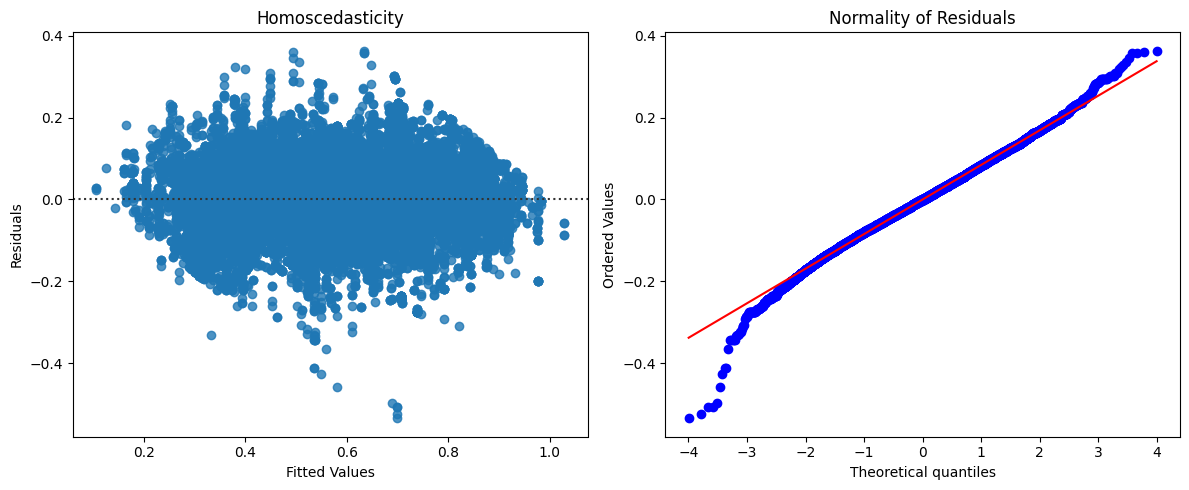

In [35]:
pred_val = results_IT_2.fittedvalues
resid = results_IT_2.resid

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for homoscedasticity
sns.residplot(x=pred_val, y=resid, line_kws={'color': 'black'}, ax=ax1)
ax1.set_title('Homoscedasticity')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# Q-Q plot for normality
stats.probplot(resid, dist='norm', plot=ax2)
ax2.set_title('Normality of Residuals')

plt.tight_layout()
plt.show()

In this particular case, the scatter plot seems to exhibit a combination of characteristics from both homoscedasticity and heteroscedasticity.

Despite trying various data transformations to mitigate the deviations observed in the lower end of the QQ plot, the residuals still exhibit a downward departure from the expected theoretical quantiles. While these deviations could be related to data issues, such as outliers, skewness, or nonlinearity, the current transformation used in the analysis represents the best result among all attempted approaches. Although the deviations are present, the chosen transformation provides the most appropriate representation of the data and is the best available option for the regression model.

**Assessment of Residuals: Histogram and QQ Plot for Continuous Variables in Linear Regression Assumptions**

In [36]:
column_mapping = {
    'CYLINDERS_10': 'CYLINDERS_10','CYLINDERS_12': 'CYLINDERS_12','CYLINDERS_3': 'CYLINDERS_3',
    'CYLINDERS_4': 'CYLINDERS_4','CYLINDERS_5': 'CYLINDERS_5','CYLINDERS_6': 'CYLINDERS_6',
    'CYLINDERS_8': 'CYLINDERS_8',
    'FUEL_E': 'FUEL_E','FUEL_N': 'FUEL_N','FUEL_Z': 'FUEL_Z',
    'TRANSMISSION_A3': 'TRANSMISSION_A3','TRANSMISSION_A6': 'TRANSMISSION_A6','TRANSMISSION_A7': 'TRANSMISSION_A7',
    'TRANSMISSION_A8': 'TRANSMISSION_A8','TRANSMISSION_A9': 'TRANSMISSION_A9','TRANSMISSION_AM7': 'TRANSMISSION_AM7',
    'TRANSMISSION_AM8': 'TRANSMISSION_AM8','TRANSMISSION_AS10': 'TRANSMISSION_AS10',
    'TRANSMISSION_AS6': 'TRANSMISSION_AS6','TRANSMISSION_AS7': 'TRANSMISSION_AS7',
    'TRANSMISSION_AS8': 'TRANSMISSION_AS8','TRANSMISSION_AV': 'TRANSMISSION_AV','TRANSMISSION_AV1': 'TRANSMISSION_AV1',
    'TRANSMISSION_AV6': 'TRANSMISSION_AV6','TRANSMISSION_AV7': 'TRANSMISSION_AV7',
    'TRANSMISSION_AV8': 'TRANSMISSION_AV8','TRANSMISSION_AV10': 'TRANSMISSION_AV10',
    'TRANSMISSION_M5': 'TRANSMISSION_M5','VEHICLE CLASS_FULL-SIZE': 'VEHICLE_CLASS_FULL_SIZE',
    'VEHICLE CLASS_PICKUP TRUCK - SMALL': 'VEHICLE_CLASS_PICKUP_TRUCK_SMALL',
    'VEHICLE CLASS_PICKUP TRUCK - STANDARD': 'VEHICLE_CLASS_PICKUP_TRUCK_STANDARD',
    'VEHICLE CLASS_SPECIAL PURPOSE VEHICLE': 'VEHICLE_CLASS_SPECIAL_PURPOSE_VEHICLE',
    'VEHICLE CLASS_STATION WAGON - MID-SIZE': 'VEHICLE_CLASS_STATION_WAGON_MID_SIZE',
    'VEHICLE CLASS_STATION WAGON - SMALL': 'VEHICLE_CLASS_STATION_WAGON_SMALL',
    'VEHICLE CLASS_SUBCOMPACT': 'VEHICLE_CLASS_SUBCOMPACT','VEHICLE CLASS_SUV - SMALL': 'VEHICLE_CLASS_SUV_SMALL',
    'VEHICLE CLASS_SUV - STANDARD': 'VEHICLE_CLASS_SUV_STANDARD','VEHICLE CLASS_TWO-SEATER': 'VEHICLE_CLASS_TWO_SEATER',
    'VEHICLE CLASS_VAN - CARGO': 'VEHICLE_CLASS_VAN_CARGO',
    'VEHICLE CLASS_VAN - PASSENGER': 'VEHICLE_CLASS_VAN_PASSENGER','ENGINE SIZE': 'ENGINE_SIZE'
}

df2= df2.rename(columns=column_mapping)

In [37]:
df2.columns

Index(['CYLINDERS_10', 'CYLINDERS_12', 'CYLINDERS_3', 'CYLINDERS_4',
       'CYLINDERS_5', 'CYLINDERS_6', 'CYLINDERS_8', 'FUEL_E', 'FUEL_N',
       'FUEL_Z', 'TRANSMISSION_A3', 'TRANSMISSION_A6', 'TRANSMISSION_A7',
       'TRANSMISSION_A8', 'TRANSMISSION_A9', 'TRANSMISSION_AM7',
       'TRANSMISSION_AM8', 'TRANSMISSION_AS10', 'TRANSMISSION_AS6',
       'TRANSMISSION_AS7', 'TRANSMISSION_AS8', 'TRANSMISSION_AV',
       'TRANSMISSION_AV1', 'TRANSMISSION_AV6', 'TRANSMISSION_AV7',
       'TRANSMISSION_AV8', 'TRANSMISSION_AV10', 'TRANSMISSION_M5',
       'VEHICLE_CLASS_FULL_SIZE', 'VEHICLE_CLASS_PICKUP_TRUCK_SMALL',
       'VEHICLE_CLASS_PICKUP_TRUCK_STANDARD',
       'VEHICLE_CLASS_SPECIAL_PURPOSE_VEHICLE',
       'VEHICLE_CLASS_STATION_WAGON_MID_SIZE',
       'VEHICLE_CLASS_STATION_WAGON_SMALL', 'VEHICLE_CLASS_SUBCOMPACT',
       'VEHICLE_CLASS_SUV_SMALL', 'VEHICLE_CLASS_SUV_STANDARD',
       'VEHICLE_CLASS_TWO_SEATER', 'VEHICLE_CLASS_VAN_CARGO',
       'VEHICLE_CLASS_VAN_PASSENGER', 'ENGI

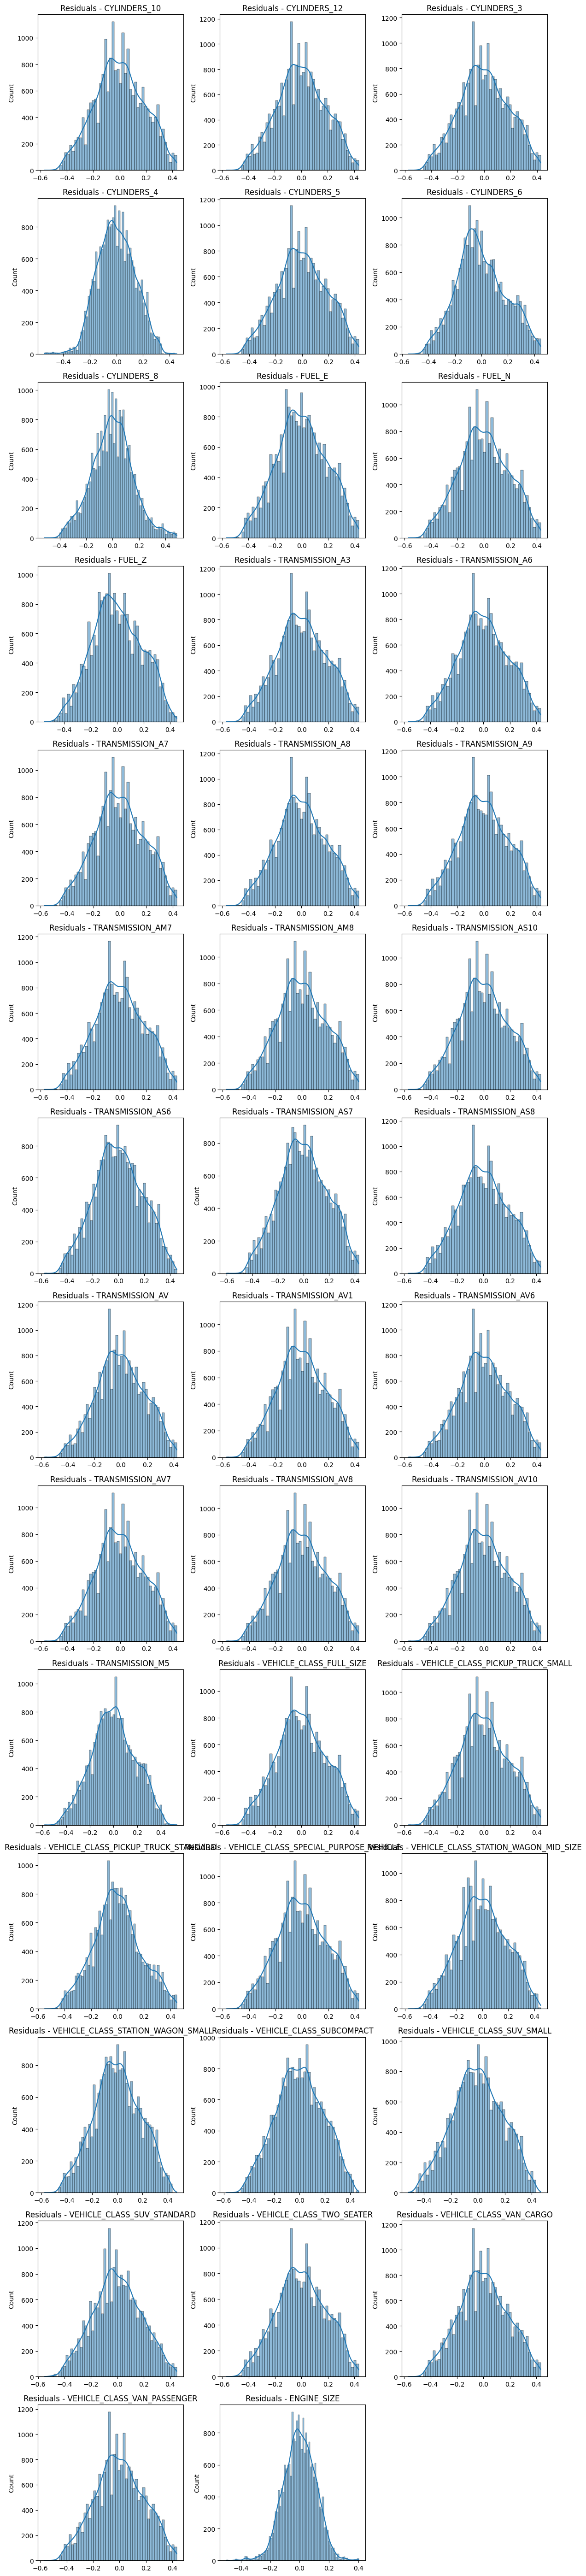

In [38]:
# List of variables to include in the formulas
variables = ['CYLINDERS_10', 'CYLINDERS_12', 'CYLINDERS_3', 'CYLINDERS_4',
             'CYLINDERS_5', 'CYLINDERS_6', 'CYLINDERS_8', 'FUEL_E', 'FUEL_N',
             'FUEL_Z', 'TRANSMISSION_A3', 'TRANSMISSION_A6', 'TRANSMISSION_A7',
             'TRANSMISSION_A8', 'TRANSMISSION_A9', 'TRANSMISSION_AM7',
             'TRANSMISSION_AM8', 'TRANSMISSION_AS10', 'TRANSMISSION_AS6',
             'TRANSMISSION_AS7', 'TRANSMISSION_AS8', 'TRANSMISSION_AV',
             'TRANSMISSION_AV1', 'TRANSMISSION_AV6', 'TRANSMISSION_AV7',
             'TRANSMISSION_AV8', 'TRANSMISSION_AV10', 'TRANSMISSION_M5',
             'VEHICLE_CLASS_FULL_SIZE', 'VEHICLE_CLASS_PICKUP_TRUCK_SMALL',
             'VEHICLE_CLASS_PICKUP_TRUCK_STANDARD',
             'VEHICLE_CLASS_SPECIAL_PURPOSE_VEHICLE',
             'VEHICLE_CLASS_STATION_WAGON_MID_SIZE',
             'VEHICLE_CLASS_STATION_WAGON_SMALL', 'VEHICLE_CLASS_SUBCOMPACT',
             'VEHICLE_CLASS_SUV_SMALL', 'VEHICLE_CLASS_SUV_STANDARD',
             'VEHICLE_CLASS_TWO_SEATER', 'VEHICLE_CLASS_VAN_CARGO',
             'VEHICLE_CLASS_VAN_PASSENGER', 'ENGINE_SIZE']

# Build the formulas using a loop
formulas = [f'EMISSIONS ~ {var}' for var in variables]

# Create fitted models in one line
models = [smf.ols(formula=formula, data=df2).fit() for formula in formulas]

# Obtain the residuals for each model
residuals = [model.resid for model in models]

# Determine the number of rows and columns for the grid
num_plots = len(formulas)
num_rows = (num_plots + 2) // 3  # Add 2 to ensure enough space for the last row
num_cols = min(num_plots, 3)

# Create subplots for the histograms in a grid layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
fig.subplots_adjust(hspace=0.4)

# Plot histograms of residuals with KDE curve
for i, ax in enumerate(axs.flat):
    if i < num_plots:
        sns.histplot(residuals[i], kde=True, ax=ax)
        ax.set_title('Residuals - ' + formulas[i].split('~')[1].strip())
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

The histograms of individual variables' residuals demonstrate distributions that are reasonably close to normality. This indicates that the assumptions of the linear regression model, including the normality assumption of residuals, are reasonably met for each variable.

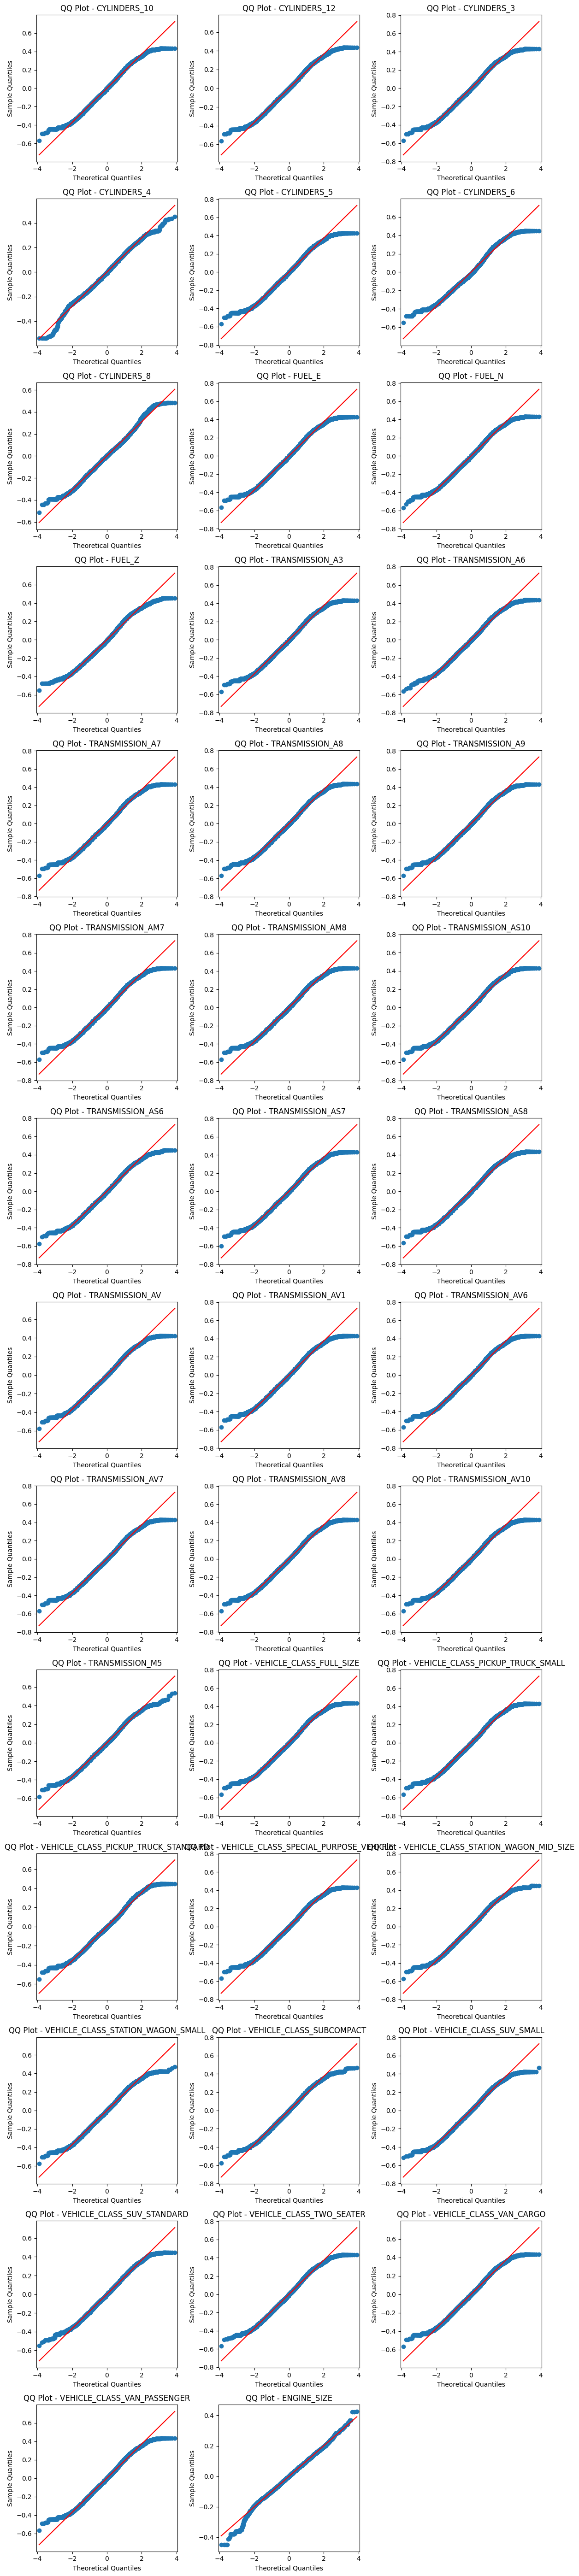

In [39]:
# List of predictor variables
variables = ['CYLINDERS_10', 'CYLINDERS_12', 'CYLINDERS_3', 'CYLINDERS_4',
             'CYLINDERS_5', 'CYLINDERS_6', 'CYLINDERS_8', 'FUEL_E', 'FUEL_N',
             'FUEL_Z', 'TRANSMISSION_A3', 'TRANSMISSION_A6', 'TRANSMISSION_A7',
             'TRANSMISSION_A8', 'TRANSMISSION_A9', 'TRANSMISSION_AM7',
             'TRANSMISSION_AM8', 'TRANSMISSION_AS10', 'TRANSMISSION_AS6',
             'TRANSMISSION_AS7', 'TRANSMISSION_AS8', 'TRANSMISSION_AV',
             'TRANSMISSION_AV1', 'TRANSMISSION_AV6', 'TRANSMISSION_AV7',
             'TRANSMISSION_AV8', 'TRANSMISSION_AV10', 'TRANSMISSION_M5',
             'VEHICLE_CLASS_FULL_SIZE', 'VEHICLE_CLASS_PICKUP_TRUCK_SMALL',
             'VEHICLE_CLASS_PICKUP_TRUCK_STANDARD',
             'VEHICLE_CLASS_SPECIAL_PURPOSE_VEHICLE',
             'VEHICLE_CLASS_STATION_WAGON_MID_SIZE',
             'VEHICLE_CLASS_STATION_WAGON_SMALL', 'VEHICLE_CLASS_SUBCOMPACT',
             'VEHICLE_CLASS_SUV_SMALL', 'VEHICLE_CLASS_SUV_STANDARD',
             'VEHICLE_CLASS_TWO_SEATER', 'VEHICLE_CLASS_VAN_CARGO',
             'VEHICLE_CLASS_VAN_PASSENGER', 'ENGINE_SIZE']

# Calculate the number of rows and columns for the grid layout
num_plots = len(variables)
num_rows = math.ceil(num_plots / 3)
num_cols = min(num_plots, 3)

# Create subplots for the QQ plots in a grid layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
fig.subplots_adjust(hspace=0.4)

# Plot QQ plots for each predictor variable
for i, ax in enumerate(axs.flat):
    if i < num_plots:
        # Create a fitted model in one line
        model = smf.ols(formula=f'EMISSIONS ~ C({variables[i]})', data=df2).fit()
        # Obtain the residuals
        residuals = model.resid
        # Generate QQ plot
        sm.qqplot(residuals, line='s', ax=ax)
        ax.set_title(f'QQ Plot - {variables[i]}')
    else:
        # Remove empty subplots if there are any
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

The QQ plots of the individual variables' residuals exhibit deviations at both ends of the tail, as previously mentioned. These deviations may be attributed to potential data issues, including outliers, skewness, or nonlinearity. However, despite dealing with outliers and applying multiple transformations, this is one of the best results that could be achieved.

## Regression Model Validation

It's important to note that stepwise selection, while commonly used, can sometimes lead to overly complex models or model overfitting. Additionally, the significance of individual predictors may change when other variables are included in the model. Therefore, it's a good practice to further evaluate the selected model's performance using validation techniques like cross-validation and to consider domain knowledge and context when interpreting the results.

In [40]:
df_val = df2.copy()
df_val.head()

,CYLINDERS_10,CYLINDERS_12,CYLINDERS_3,CYLINDERS_4,CYLINDERS_5,CYLINDERS_6,CYLINDERS_8,FUEL_E,FUEL_N,FUEL_Z,...,VEHICLE_CLASS_STATION_WAGON_MID_SIZE,VEHICLE_CLASS_STATION_WAGON_SMALL,VEHICLE_CLASS_SUBCOMPACT,VEHICLE_CLASS_SUV_SMALL,VEHICLE_CLASS_SUV_STANDARD,VEHICLE_CLASS_TWO_SEATER,VEHICLE_CLASS_VAN_CARGO,VEHICLE_CLASS_VAN_PASSENGER,ENGINE_SIZE,EMISSIONS
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.257596,0.330903
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.257596,0.276926
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0.567924,0.518910
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0.608045,0.640986
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.310328,0.386261


In [41]:
X = df_val.drop('EMISSIONS', axis=1)
y = df_val['EMISSIONS']

To evaluate the performance of a model and compare the Mean Squared Errors (MSEs) across different train-test split ratios, the dataset was split into the following proportions: 75-25, 80-20, 70-30, 60-40 and 90-10 in order to comparse the MSEs

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train-Test Split: 75-25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse_75 = mean_squared_error(y_train, y_hat_train)
test_mse_25 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error_75:', train_mse_75)
print('Test Mean Squared Error_25: ', test_mse_25)
print()

# Train-Test Split: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse_80 = mean_squared_error(y_train, y_hat_train)
test_mse_20 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error_80:', train_mse_80)
print('Test Mean Squared Error_20: ', test_mse_20)
print()

# Train-Test Split: 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, test_size=0.3)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse_70 = mean_squared_error(y_train, y_hat_train)
test_mse_30 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error_70:', train_mse_70)
print('Test Mean Squared Error_30: ', test_mse_30)
print()

# Train-Test Split: 60-40
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=0.4)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse_60 = mean_squared_error(y_train, y_hat_train)
test_mse_40 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error_60:', train_mse_60)
print('Test Mean Squared Error_40: ', test_mse_40)
print()

# Train-Test Split: 90-10
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44, test_size=0.1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_mse_90 = mean_squared_error(y_train, y_hat_train)
test_mse_10 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error_90:', train_mse_90)
print('Test Mean Squared Error_10: ', test_mse_10)

Train Mean Squared Error_75: 0.007172683347902429
Test Mean Squared Error_25:  0.007247959044751134

Train Mean Squared Error_80: 0.00720416057335757
Test Mean Squared Error_20:  0.0071288231702191516

Train Mean Squared Error_70: 0.007242628717467259
Test Mean Squared Error_30:  0.007079321964373973

Train Mean Squared Error_60: 0.00722627732880003
Test Mean Squared Error_40:  0.007145762369169498

Train Mean Squared Error_90: 0.0071876496302579794
Test Mean Squared Error_10:  0.007191646377458935


1. The MSE values for both the training and testing data are relatively close to each other for each train-test split. This suggests that the model is not overfitting, as it performs similarly on both the training and testing data.

2. The MSE values are relatively low, indicating that the model's predictions are generally close to the actual values, which is a positive sign.

3. Across different train-test splits, the model consistently performs well with low MSE values, which indicates the model's stability and robustness.

## K-Fold Validation

In [43]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Reset the index of DataFrame X
X = X.reset_index(drop=True)

# Convert y to a NumPy array
y = y.values

# Define the number of folds (k)
k = 5

# Create an instance of the linear regression model
linreg = LinearRegression()

# Create an instance of the k-fold cross-validation splitter
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store the MSE values for train and test sets
train_mse_list = []
test_mse_list = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets based on the current fold
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the train set
    linreg.fit(X_train, y_train)
    
    # Predict the target variable for train and test sets
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Calculate the mean squared error for train and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Append the MSE values to the lists
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

# Calculate the mean MSE values for train and test sets
mean_train_mse = np.mean(train_mse_list)
mean_test_mse = np.mean(test_mse_list)

# Print the mean MSE values for train and test sets
print('Mean Train Mean Squared Error:', mean_train_mse)
print('Mean Test Mean Squared Error:', mean_test_mse)

Mean Train Mean Squared Error: 0.007182024730219057
Mean Test Mean Squared Error: 0.007225135297286781


In this case, the mean train MSE is 0.00718, suggesting that, on average, the model's predictions are quite close to the actual values on the training data.

The mean test MSE is 0.00723, suggesting that, on average, the model's predictions are also relatively close to the actual values on the testing data.

Overall, the results suggest that the linear regression model is performing well on both the training and testing datasets. The fact that the mean test MSE is not significantly higher than the mean train MSE indicates that the model is not overfitting to the training data, which is a positive sign.

# Observations & Recommendations

### Observations:

Here are some facts based on the provided regression results for reducing emission levels produced by vehicles:

* Cylinder Count: 
According to the coefficients for the different cylinder counts (Cylinders 10, Cylinders 12, Cylinders 3, Cylinders 4, Cylinders 5, Cylinders 6, Cylinders 8), fewer cylinders generally result in lower emissions. As a result, vehicles with smaller engines (fewer cylinders) tend to produce fewer emissions. It is possible to reduce emissions by encouraging the use of smaller, more fuel-efficient engines.

* Fuel Type: 
Vehicles using certain fuel types (such as Fuel E - Ethanol E85 & Fuel N - Natural Gas) produce fewer emissions than those using others (such as Fuel Z - Premium Gasoline). It is possible to significantly reduce emissions by promoting the use of cleaner fuels or alternative energy sources, such as electric or hybrid vehicles.


* Transmission Type:
Based on the coefficients for different transmission types (such as Transmission A3, Transmission A6, Transmission M5), specific transmission technologies may influence emissions. Emissions can be reduced with advanced transmissions (such as automatics with more gears or modern continuously variable transmissions).


* Vehicle Class: 
As shown by the coefficients for different vehicle classes, different vehicle classes have varying impacts on emissions. In comparison to smaller and more compact vehicles, SUVs and pickup trucks produce more emissions. The adoption of fuel-efficient vehicles, such as subcompacts and hybrids, could contribute to the reduction of emissions.


* Engine Size: 
Larger engine sizes produce higher emissions, according to the coefficient for Engine Size. Emissions can be reduced by promoting vehicles with smaller, more efficient engines.

### Recommendations:

The following are some general recommendations for reducing emissions based on these observations:

* Smaller engines and fewer cylinders should be encouraged, especially in urban areas where fuel efficiency is of greatest importance.

* Using cleaner fuels or alternative energy sources, such as electric or hybrid vehicles, can significantly reduce emissions.

* Improve fuel efficiency and reduce emissions through the development and use of advanced transmission technologies.

* Provide incentives for fuel-efficient vehicle purchases, and discourage the use of high-emission vehicles in commercial and public fleets.

* Research and develop new technologies to improve fuel efficiency and emissions reduction in vehicles.
